In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/hri/east/ML'

In [3]:
train = pd.read_csv("data/train_titanic.csv", index_col = 'PassengerId')
test = pd.read_csv("data/test_titanic.csv", index_col = 'PassengerId')

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 11)

In [6]:
test.shape

(418, 10)

In [7]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()
#결측치가 있는 컬럼 : Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
#컬럼 정보 정리
train.columns
#Survived : 생존/사망 결과 값 담긴 컬럼
#Pclass : 객실 등급(1:상위층, 2:중상위층, 3:하위층)
#SibSp : 형제자매/배우자 수 (같이 탑승한)
#Parch : 부모/자식 수 (같이 탑승한)
#Ticket : 티켓의 번호
#Fare : 지불 요금
#Cabin : 객실 번호 **번호 그 자체로 넣게 되면 연관관계를 찾을 수 없음**
#Embarked : 승선항 (S,C,Q)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#train 결측치가 있는 컬럼 : Age, Cabin, Embarked 채우기
#test 결측치가 있는 컬럼 : Age, Fare, Cabin

In [11]:
#1. 결측치가 있는 행 전체 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나 모델링에 치명적이지 않은 데이터
# > 데이터 많을수록 과대적합을 피할 수 있는데, 삭제하면 학습하는 데이터가 줄어듦.
#2. 결측치를 다른 값으로 대체하는 방법
# > 평균값, 최빈값, 중앙값, 다른 변수와 관계를 보고 입력, ...

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
#1.첫번째 결측치 있는 열 탐색
train['Embarked'].value_counts()
train['Embarked'].isnull().value_counts()
#train['Embarked'].isnull().sum()

Embarked
False    889
True       2
Name: count, dtype: int64

In [14]:
train['Embarked'][train['Embarked'].isnull() == True] = 'S'
#혹은 fillna('값')
#비어있는 데이터가 있다면 '값'으로 채워주는 함수
#train['Embarked'] = train['Embarked'].fillna('S')

/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_82358/1022743734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'][train['Embarked'].isnull() == True] = 'S'


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [16]:
#Fare컬럼과 연관성이 있는 컬럼이 있지 않을까??
test['Fare'].describe()
test.corr(numeric_only=True) #숫자로 된 컬럼 포함
# -1,1에 가까울수록 해당 컬럼과 상관이 높다, 0에 가까울수록 해당 컬럼과 선형관계가 없음

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [17]:
train['Fare'].describe()
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
#train, test, fare 컬럼은 pclass와 연관성이 상대적으로 높다
train.corr(numeric_only=True)['Fare'].abs().sort_values(ascending=False)

Fare        1.000000
Pclass      0.549500
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.096067
Name: Fare, dtype: float64

<Axes: >

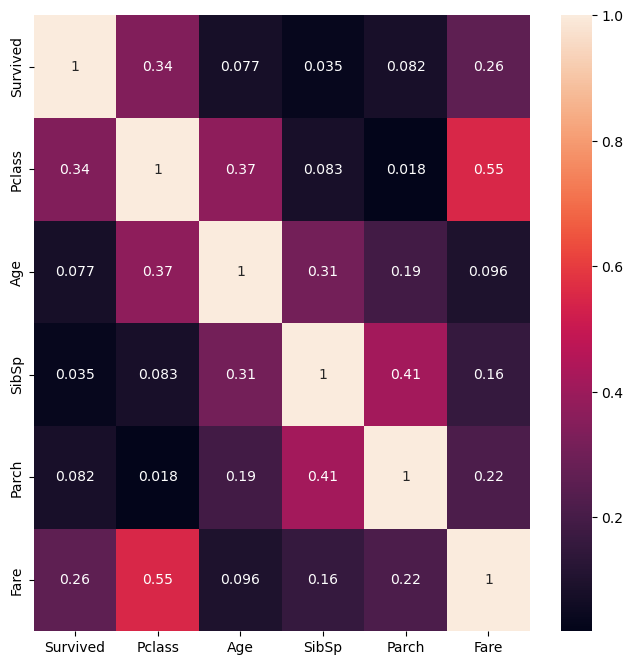

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only=True).abs(), annot = True)

In [20]:
#train Pclass
train['Pclass'].unique()

array([3, 1, 2])

In [21]:
#객실 등급을 기준으로 그룹화, 요금 집계함수는 중앙값
train[['Pclass', 'Fare']].groupby(['Pclass']).median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [22]:
train[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [23]:
# Pclass, sex를 기준으로 그룹핑해서 fare의 중앙값을 확인
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [24]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [25]:
#Pclass는 3등석, 남자 - 7.92500
test['Fare'].fillna(7.925, inplace = True)

In [26]:
test['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [28]:
# train, test Age 채우기
## 위에서 사용했던 Pclass, sex 컬럼을 그룹핑하여 Age의 집계를 확인하고 채우기
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [30]:
#Age는 Pclass와 상관관계가 상대적으로 높았음
#Pclass, sex를 구릅화하여 age 평균 출력
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [31]:
#2등급 객실, 남성일 경우의 평균 데이터 가져오기
gb1.loc[(2,'male'),:].iloc[0] #값하나만 뽑아주기

30.74070707070707

In [32]:
#train Age 결측치 행
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [33]:
#규칙에 맞게 Pclass와 Sex를 보면서 Age 채워넣는 함수 정의
def fill_age(row):
    # row : 받아오는 행에 데이터에 대한 매개변수
    # row의 age가 결측치라면 gb1에서 매칭되는 값을 찾아서 인덱싱 해오도록
    # 결측치가 아니라면 원래 작성된 나이값을 사용
    
    #만약에 나이가 결측치라면, gb1의 값을 인덱싱
    if np.isnan(row['Age']) : #받아온 행의 Age가 결측치라면
        return gb1.loc[(row['Pclass'],row['Sex']),:].iloc[0]

    else:
        return row['Age']

In [34]:
train['Age'] = train.apply(fill_age, axis=1).astype(np.int64)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [36]:
test['Age'] = test.apply(fill_age, axis=1).astype(np.int64)

In [37]:
##정리
# apply, fill_age
# 데이터를 행단위로 매개변수에 전달
# 결과값으로 Age를 채울 수 있는 대표값을 하나 return
# 정수형으로 변환을 해서 'Age'컬럼에 넣어줌

In [38]:
#Cabin 채우기
#임의의 값으로 결측치를 채워볼 예정
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [40]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
train['Cabin'].str[0].unique()
#데이터 내부 분자열에 접근하는 함수

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
train['Deck'] = train['Cabin'].str[0]

In [43]:
test['Deck'] = test['Cabin'].str[0]

In [44]:
train[['Deck', 'Cabin']]

,Deck,Cabin
PassengerId,,
1,M,M
2,C,C85
3,M,M
4,C,C123
5,M,M
...,...,...
887,M,M
888,B,B42
889,M,M


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [46]:
train.drop('Cabin', axis=1, inplace = True)

<Axes: xlabel='Deck', ylabel='count'>

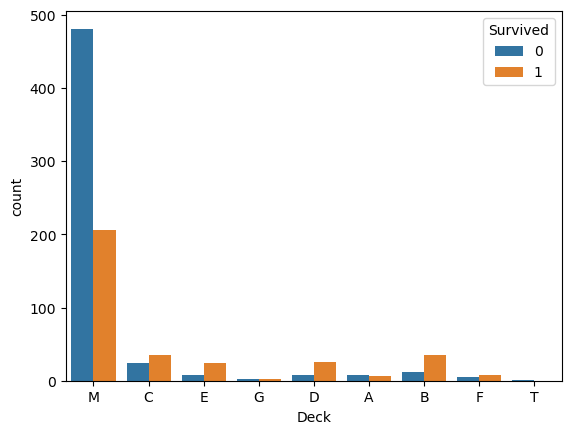

In [47]:
###시각화
sns.countplot(data=train, x='Deck', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

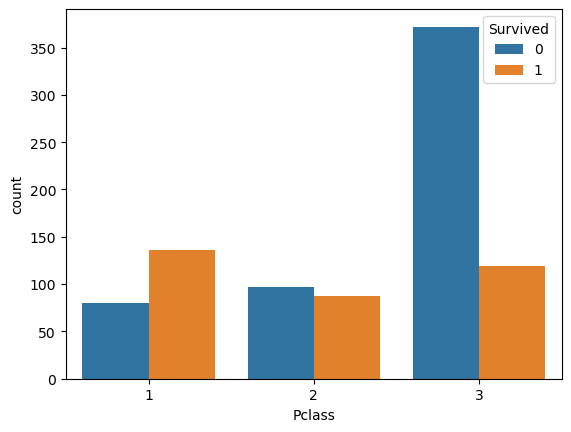

In [48]:
# Pclass에 따른 생존/사망 시각화(층이 객실 등급이랑 연관이 있진 않을까)
sns.countplot(data=train, x='Pclass', hue='Survived')
#3등석에 탐승한 사람들이 비교적 사망자수가 많음

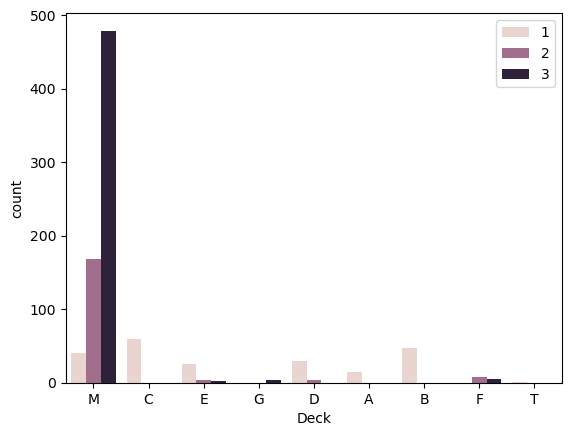

In [49]:
#Deck과 Pclass를 시각화 연결
sns.countplot(data=train, x='Deck', hue='Pclass')
plt.legend()
plt.show()
#M층 사람들은 웬만하면 3등석 사람들이구나

In [50]:
# 임의의 층 M층에는 3등석인 사람들이 많음
# 그래서 Pclass가 3등급이어서 사망자가 많았음을 확인할 수가 있다
# 그래서 M이라는 데이터는 더이상 신경쓰지 않는다. Pclass데이터를 통해 알 수 있기 때문에.

<Axes: xlabel='Sex', ylabel='count'>

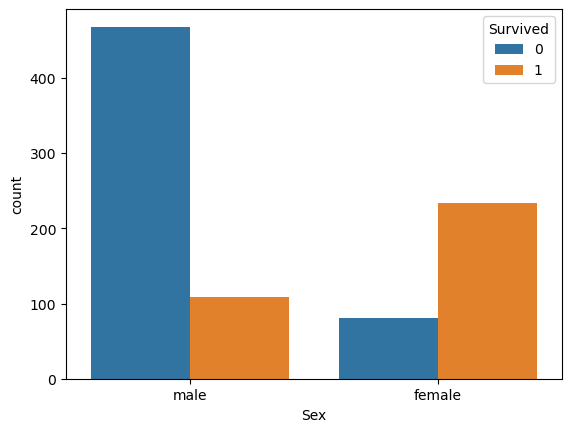

In [51]:
# sex별, embarked별(범주형데이터)에 따른 생존/사망 시각화
sns.countplot(data=train, x='Sex', hue='Survived')
#남성 사망율이 높고, 여성 사망율은 낮음!

<Axes: xlabel='Embarked', ylabel='count'>

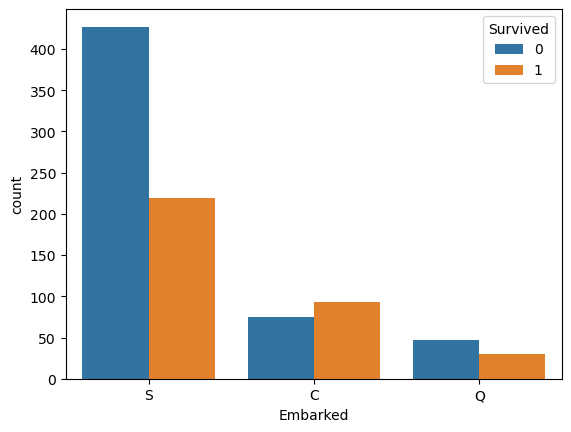

In [52]:
sns.countplot(data=train, x='Embarked', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

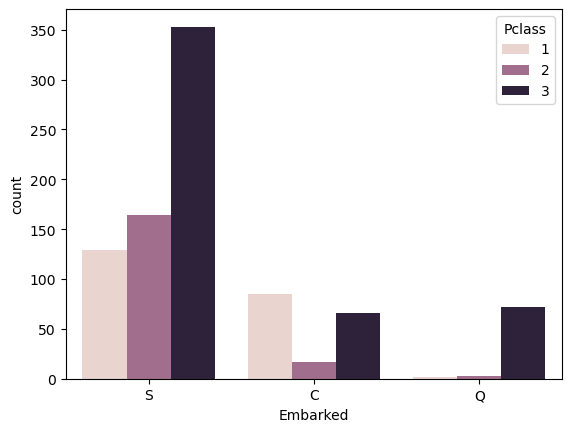

In [53]:
sns.countplot(data=train, x='Embarked', hue='Pclass')
#3등석의 비율이 다른 승선항보다 더 높지는 않다.

<Axes: xlabel='Age', ylabel='count'>

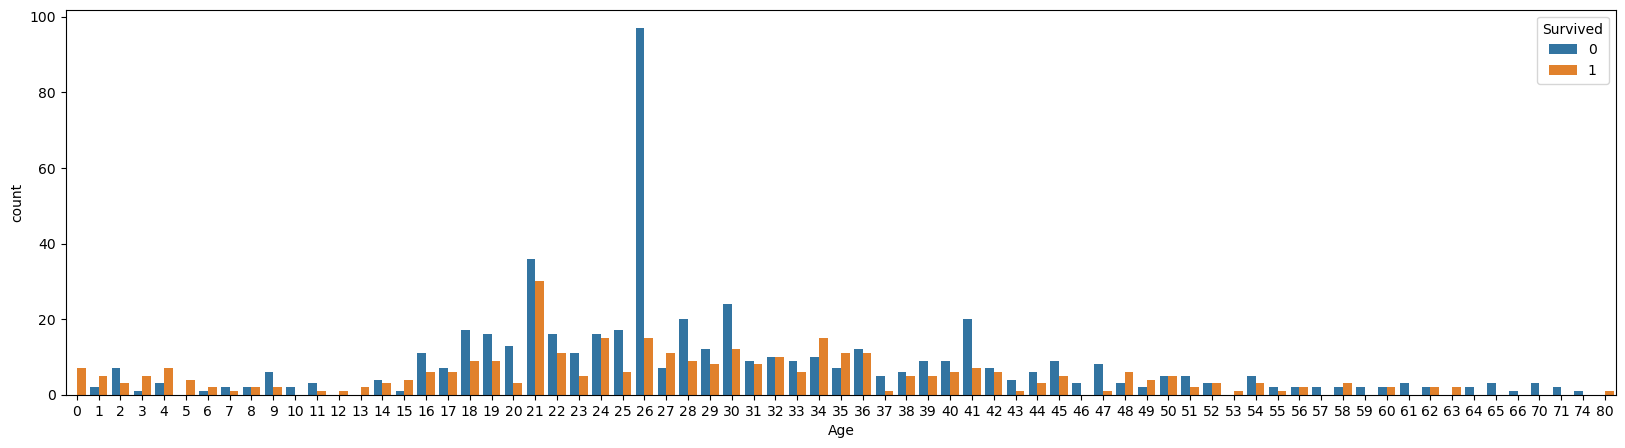

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(data=train, x='Age', hue='Survived')

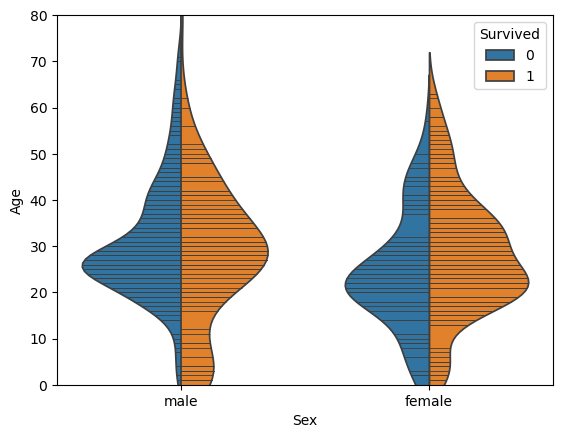

In [55]:
#나이데이터를 countplot으로 시각화했더니 해석하기가 힘들다
#violinplot

#성별과 나이에 따른 생존/사망자 수 확인
sns.violinplot(
    data=train,
    x='Sex',
    y='Age',
    hue='Survived',
    split=True, #데이터를 양쪽에 나눠서 표현
    inner='stick' #바이올린 내부에 개별 데이터선
)

plt.ylim(0,80)
plt.show()

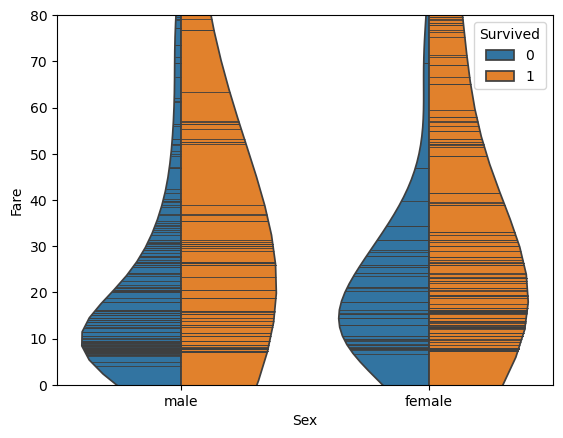

In [56]:
#나이데이터를 countplot으로 시각화했더니 해석하기가 힘들다
#violinplot

#성별과 나이에 따른 생존/사망자 수 확인
sns.violinplot(
    data=train,
    x='Sex',
    y='Fare',
    hue='Survived',
    split=True, #데이터를 양쪽에 나눠서 표현
    inner='stick' #바이올린 내부에 개별 데이터선
)

plt.ylim(0,80)
plt.show()

In [57]:
#특성공학 : 새로운 컬럼을 생성(transform)
#parch, sibsp를 더해서 가족의 숫자라는 새로운 칼럼으로 생성
#train, test 동일하게 적용

In [58]:
train['Family Size'] = train['Parch'] + train['SibSp'] + 1
train['Family Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family Size, Length: 891, dtype: int64

In [59]:
test['Family Size'] = test['Parch'] + test['SibSp'] + 1
test['Family Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family Size, Length: 418, dtype: int64

<Axes: xlabel='Family Size', ylabel='count'>

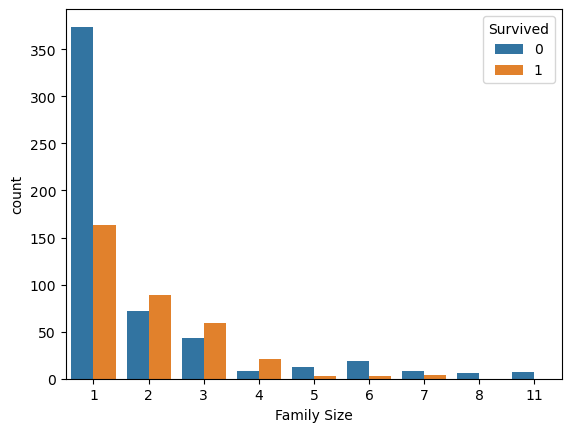

In [60]:
# 시각화
sns.countplot(data=train, x='Family Size', hue='Survived')

In [61]:
#1명일때는 사망률이 높음 - alone
#2명~4명일때는 생존률이 높음 - small
#5명 이상일때는 사망률이 높음 - Large

#수치형 -> 범주 (binning)
bins = [0,1,4,11]
#(0,1] -> 0초과 1이하
#(1,4] -> 1초과 4이하
#(4,11] ->4초과 11이하

labels = ['Alone', 'Small', 'Large']
#group이라는 새로운 컬럼을 만들기
#cut : 연속적인 수치형 데이터를 일정 범위로 나누어줌 -> 범주형
train['Family group'] = pd.cut(train['Family Size'], bins = [0,1,4,11], labels = ['Alone', 'Small', 'Large'])

In [62]:
train['Family group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [63]:
test['Family group'] = pd.cut(test['Family Size'], bins = [0,1,4,11], labels = ['Alone', 'Small', 'Large'])
test['Family group']

PassengerId
892     Alone
893     Small
894     Alone
895     Alone
896     Small
        ...  
1305    Alone
1306    Alone
1307    Alone
1308    Alone
1309    Small
Name: Family group, Length: 418, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<Axes: xlabel='Family group', ylabel='count'>

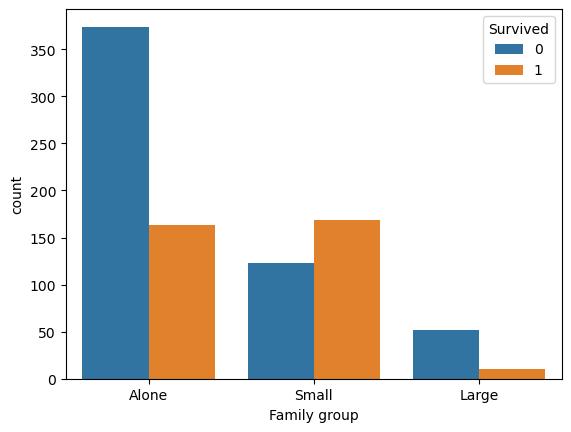

In [64]:
# 시각화
sns.countplot(data=train, x='Family group', hue='Survived')

In [65]:
#불필요한 컬럼 삭제
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family Size   891 non-null    int64   
 12  Family group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 91.5+ KB


In [66]:
#이름, 티켓번호, 형제자매, 동행부모, 가족의 크기
train.drop(['Name','Ticket','SibSp','Parch','Family Size'], axis=1, inplace=True)
test.drop(['Name','Ticket','SibSp','Parch','Family Size'], axis=1, inplace=True)

In [67]:
test.drop(['Cabin'], axis=1, inplace=True)

In [68]:
train.shape, test.shape
### 전처리 과정은 마무리
#train에는 정답데이터, 문제데이터 하나의 프레임으로 들어있는 상태
#X_train, y_train
#test는 원래 정답을 제공하지 않음.

((891, 8), (418, 7))

In [69]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [70]:
X_train_one_hot = pd.get_dummies(X_train) #dtype='int64'
X_test_one_hot = pd.get_dummies(X_test)

In [71]:
X_train_one_hot.shape, X_test_one_hot.shape

((891, 20), (418, 19))

In [72]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family group_Alone',
       'Family group_Small', 'Family group_Large'],
      dtype='object')

In [73]:
#특성 개수 맞추기
#컬럼명을 확인해서 다른점 찾기
#set() 집합 자료구조 활용해서 찾기

In [74]:
set(X_train_one_hot) - set(X_test_one_hot)

{'Deck_T'}

In [75]:
#X_test에 Deck_T라는 컬럼을 새롭게 만들어주자
X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [76]:
X_train_one_hot.info()
X_test_one_hot.info()


#train의 순서대로 test를 재배열해줘야함
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_C          891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   Deck_A              891 non-null    bool   
 9   Deck_B              891 non-null    bool   
 10  Deck_C              891 non-null    bool   
 11  Deck_D              891 non-null    bool   
 12  Deck_E              891 non-null    bool   
 13  Deck_F              891 non-null    bool   
 14  Deck_G              891 non-null    bool   
 15  Deck_M              891 non-null    bool   
 16  Deck_T       

In [77]:
X_train_one_hot.info()
X_test_one_hot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_C          891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   Deck_A              891 non-null    bool   
 9   Deck_B              891 non-null    bool   
 10  Deck_C              891 non-null    bool   
 11  Deck_D              891 non-null    bool   
 12  Deck_E              891 non-null    bool   
 13  Deck_F              891 non-null    bool   
 14  Deck_G              891 non-null    bool   
 15  Deck_M              891 non-null    bool   
 16  Deck_T       

In [78]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [79]:
tree_model = DecisionTreeClassifier()

In [80]:
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv=5)

In [81]:
#평균적으로 78%의 성능을 내고 있다
#test에서는 좀 더 떨어질 수도 있겠다

In [82]:
##tree model의 하이퍼파라미터를 조정(최대 깊이)
tree_model2 = DecisionTreeClassifier(max_depth = 3)
result = cross_val_score(tree_model2, X_train_one_hot, y_train, cv=5)
result

array([0.81005587, 0.81460674, 0.80337079, 0.78089888, 0.80337079])

In [83]:
#교차검증을 하면서, 하이퍼파라미터 조정 (1~9)
for md in range(1,10):
    tree_model = DecisionTreeClassifier(max_depth = md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv=5)
    print(f"depth:{md}일 때, {result.mean()}")

depth:1일 때, 0.7867365513778168
depth:2일 때, 0.773316176009039
depth:3일 때, 0.8024606113866047
depth:4일 때, 0.8081288054736049
depth:5일 때, 0.8159374803841567
depth:6일 때, 0.815956311593748
depth:7일 때, 0.8137153976523759
depth:8일 때, 0.8148138848785388
depth:9일 때, 0.8047203565375682


In [84]:
# 모델 학습 (random state로 재현성 실험할 때 씀)
#from sklearn.model_selection import KFold
#tree_model2 = DecisionTreeClassifier(max_depth = 4)

#result = cross_val_score(tree_model2, X_train_one_hot, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=25))
#result.mean()

In [85]:
tree_model2 = DecisionTreeClassifier(max_depth=8)
tree_model2.fit(X_train_one_hot, y_train)
#predict
pre2 = tree_model2.predict(X_test_one_hot)
result2 = pd.read_csv('data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/tree_model_2.csv', index=False)

In [86]:
#tree_model2가 어떤 특성을 중요하게 생각하는지
fi = tree_model2.feature_importances_

In [87]:
fi_s = pd.DataFrame(fi, index = X_train_one_hot.columns, columns = ['imp'])
fi_s.sort_values('imp', ascending=False)

,imp
Sex_male,0.434454
Age,0.163487
Fare,0.124852
Pclass,0.112091
Deck_M,0.049226
Family group_Small,0.040632
Family group_Large,0.035096
Deck_E,0.016548
Embarked_S,0.007199
Family group_Alone,0.005542


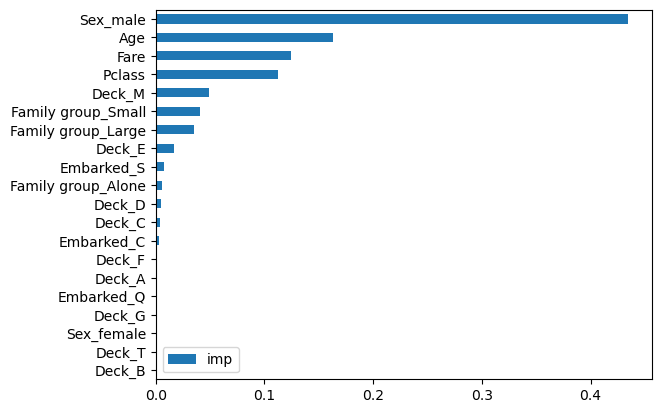

In [88]:
fi_s.sort_values('imp', ascending=True).plot.barh()
plt.show()

In [89]:
#####앙상블######

In [90]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
#랜덤포레스트 모델 정의
forest_model = RandomForestClassifier(n_estimators=100, #트리개수
                                      max_features=5, #각 트리가 선택할 최대 특성 수
                                      max_depth=4,
                                      random_state=11
)

In [92]:
#랜덤포레스트 모델 교차검증
result_RF = cross_val_score(forest_model, X_train_one_hot, y_train, cv=5)
result_RF.mean()

0.8159312033142928

In [93]:
#에이다부스팅 모델 정의
ada_model = AdaBoostClassifier(n_estimators=100,
                               random_state=14
    
)

In [94]:
result_ada = cross_val_score(ada_model,
                            X_train_one_hot,
                            y_train,
                            cv=5)
result_ada.mean()

0.8137279517921033

In [95]:
#보팅
#estimators에 튜플로 해당 모델의 명칭을 같이 넣어줘야함
voting_model = VotingClassifier(estimators=[
    ('tree', tree_model2),
    ('forest', forest_model),
    ('ada', ada_model)
],
    voting = 'soft'
)

In [96]:
#교차검증
result_voting = cross_val_score(voting_model,
                               X_train_one_hot,
                               y_train,
                               cv=5)
result_voting.mean()

0.819327098110602

In [97]:
#xg부스트, lightgbm
!pip install xgboost

In [98]:
!pip install lightgbm

In [99]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [100]:
#xg
xg_model = XGBClassifier(n_estimators = 100, random_state=13)

In [101]:
y_train.info() #xgboost, lightgbm은 정답데이트여도 항상 숫자형이어야 함!!

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [102]:
#교차검증
result_xg = cross_val_score(xg_model,
                               X_train_one_hot,
                               y_train,
                               cv=5)
result_xg.mean()

0.8114682066411399

In [103]:
#lgb
lgb_model = LGBMClassifier(n_estimators=100, random_state=17)

In [104]:
#교차검증
#result_lgb = cross_val_score(lgb_model,X_train_one_hot,y_train,cv=5)
#result_lgb.mean()

In [105]:
#그리드서치 적용해서 최적의 하이퍼파라미터 찾기
from sklearn.model_selection import GridSearchCV

In [106]:
#1. 하이퍼파라미터(초 매개변수) 경우의 수 설정
params = {
    'n_estimators' : [50,100,200], #tree의 개수
    'max_depth' : [3,5,7], #트리의 최대 깊이를 제한
    'min_samples_split' : [3,5,7], #노드를 분할하기 위한 최소 샘플 수
}
#2. 모델 초기화(생성)
rf_clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf_clf,
    params,
    cv = 5,
    n_jobs = -1 #사용 가능한 모든 cpu코어를 사용하여 병렬처리로 수행
)

#3. 실행
grid.fit(X_train_one_hot, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [107]:
#최적의 하이퍼파라미터 조합 확인
grid.best_params_

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}

In [108]:
grid.best_score_

0.8226790534178645

In [109]:
#최적의 하이퍼파라미터로 세팅된 모델
best_rf_clf = grid.best_estimator_
best_rf_clf

RandomForestClassifier(max_depth=7, min_samples_split=5, random_state=42)

In [110]:
cross_val_score(best_rf_clf, X_train_one_hot, y_train, cv=5).mean()

0.8226790534178645

In [111]:
###3번째 (랜포)

#tree_model2 = DecisionTreeClassifier(max_depth=8)
best_rf_clf.fit(X_train_one_hot, y_train)
#predict
pre3 = best_rf_clf.predict(X_test_one_hot)
result3 = pd.read_csv('data/gender_submission.csv')
result3['Survived'] = pre3
result3.to_csv('data/rf_model_3.csv', index=False)

In [112]:
#랜포, ada, xg, lightgbm 전부 다 해서 보팅으로 비교하기
#이후 gridsearch

forest_model = RandomForestClassifier(n_estimators=100, #트리개수
                                      max_features=5, #각 트리가 선택할 최대 특성 수
                                      max_depth=4,
                                      random_state=11
)

ada_model = AdaBoostClassifier(n_estimators=100,
                               random_state=14
    
)

xg_model = XGBClassifier(n_estimators = 100, random_state=13)

lgb_model = LGBMClassifier(n_estimators=100, random_state=17)

voting_model = VotingClassifier(estimators=[
    ('tree', tree_model2),
    ('forest', forest_model),
    ('ada', ada_model),
    ('xg', xg_model)
],
    voting = 'soft'
)

result_voting = cross_val_score(voting_model,
                               X_train_one_hot,
                               y_train,
                               cv=5)
result_voting.mean()

0.8327788588286987

In [ ]:
#1. 하이퍼파라미터(초 매개변수) 경우의 수 설정
params = {
    'forest__n_estimators': [50,100,200],
    'forest__max_depth': [3,5,7],
    'forest__min_samples_split': [3,5,7],

    'xg__max_depth': [3,5,7],
    'xg__learning_rate': [0.01, 0.1, 0.3],
    'xg__n_estimators': [50,100,200],

    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0],

    'tree__max_depth': [3, 5, 7],
    'tree__min_samples_split': [2, 4, 6],

}

grid = GridSearchCV(
    voting_model,
    params,
    cv = 5,
    n_jobs = -1 #사용 가능한 모든 cpu코어를 사용하여 병렬처리로 수행
)

#3. 실행
grid.fit(X_train_one_hot, y_train)

In [114]:
print(grid.best_params_)
print(grid.best_score_)
#최적의 하이퍼파라미터로 세팅된 모델
best_rf_clf = grid.best_estimator_
print(best_rf_clf)

{'ada__learning_rate': 0.01, 'ada__n_estimators': 50, 'forest__max_depth': 5, 'forest__min_samples_split': 3, 'forest__n_estimators': 50, 'tree__max_depth': 7, 'tree__min_samples_split': 6, 'xg__learning_rate': 0.3, 'xg__max_depth': 3, 'xg__n_estimators': 200}
0.8462620048961144
VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=6)),
                             ('forest',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=5,
                                                     min_samples_split=3,
                                                     n_estimators=50,
                                                     random_state=11)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.01,
                                           

In [115]:
cross_val_score(best_rf_clf, X_train_one_hot, y_train, cv=5).mean()

0.8440148138848785